CLASIFICADOR


In [ ]:
from google.colab import  drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/dataset")  #hacer una carpeta dataset y subir a drive 


In [ ]:
ls

my_model.png  train/  validation/


In [ ]:
#direcciones carpetas de objetos de entrenamiento
train_CUBO_RUBIK_dir=os.path.join("train/CUBO_RUBIK")
train_GORRA_dir=os.path.join("train/GORRA")
train_PELUCHE_OSO_dir=os.path.join("train/PELUCHE_OSO")

VALIDACION

In [ ]:
#direcciones carpetas de objetos de validacion
validation_CUBO_RUBIK_dir=os.path.join("validation/CUBO_RUBIK")
validation_GORRA_dir=os.path.join("validation/GORRA")
validation_PELUCHE_OSO_dir=os.path.join("validation/PELUCHE_OSO")

In [ ]:
print("imagenes cubo de rubik: ", len(os.listdir(train_CUBO_RUBIK_dir)))
print("imagenes gorra: ", len(os.listdir(train_GORRA_dir)))
print("imagenes peluche oso: ", len(os.listdir(train_PELUCHE_OSO_dir)))

imagenes cubo de rubik:  250
imagenes gorra:  250
imagenes peluche oso:  234


In [ ]:
print("datos validacion")
print("imagenes cubo de rubik: ", len(os.listdir(validation_CUBO_RUBIK_dir)))
print("imagenes gorra: ", len(os.listdir(validation_GORRA_dir)))
print("imagenes peluche oso: ", len(os.listdir(validation_PELUCHE_OSO_dir)))

datos validacion
imagenes cubo de rubik:  150
imagenes gorra:  150
imagenes peluche oso:  150


In [ ]:
import tensorflow as tf
from tensorflow import keras
model= keras.models.Sequential([
                                
                              #capa 1
                              keras.layers.Conv2D(16,(3,3), activation="relu", input_shape=(480,640,3)),
                              keras.layers.MaxPooling2D(2,2),
                              #capa 2
                              keras.layers.Conv2D(32,(3,3), activation="relu"),
                              keras.layers.MaxPooling2D(2,2),
                              #capa 3
                              keras.layers.Conv2D(64,(3,3), activation="relu"),
                              keras.layers.MaxPooling2D(2,2),
                             
                              #capa 4
                              keras.layers.Conv2D(32,(3,3), activation="relu"),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Dropout(0.2),
                              #capa 5
                              keras.layers.Conv2D(16,(3,3), activation="relu"),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Dropout(0.2),
                             
                              #capa de aplanado
                              keras.layers.Flatten(),
                              #Capa Densa 1
                              keras.layers.Dense(128,activation = "relu"),
                              keras.layers.Dropout(0.2),
                              #Capa Densa 2
                              keras.layers.Dense(64,activation = "relu"),
                              keras.layers.Dropout(0.2),
                              #capa de salida
                              keras.layers.Dense(3,activation =tf.nn.softmax)

                          ])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 478, 638, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 239, 319, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 237, 317, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 118, 158, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 116, 156, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 58, 78, 64)      

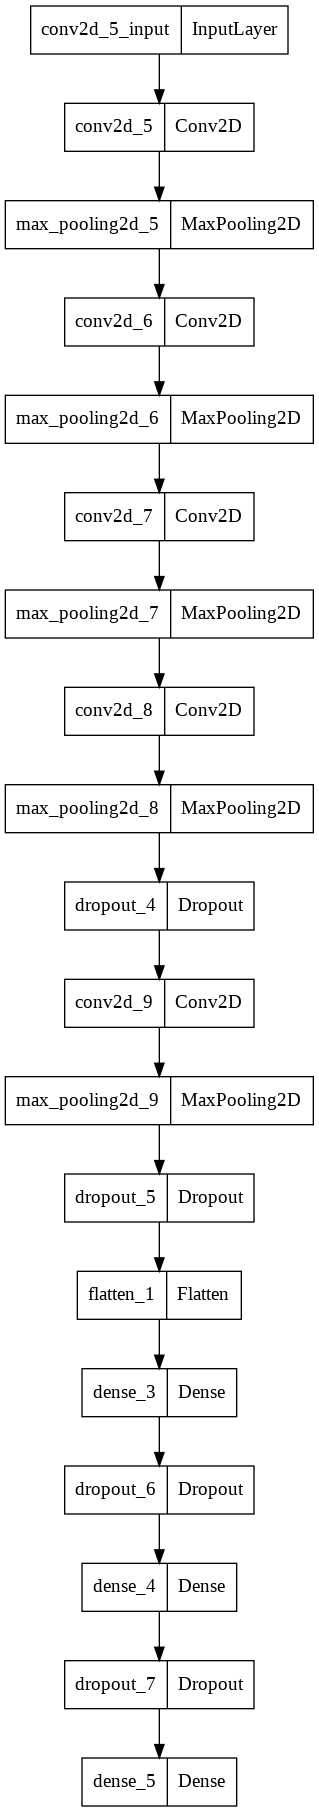

In [ ]:
#graficamos el modelo de la red neuronal
keras.utils.plot_model(model,"my_model.png")

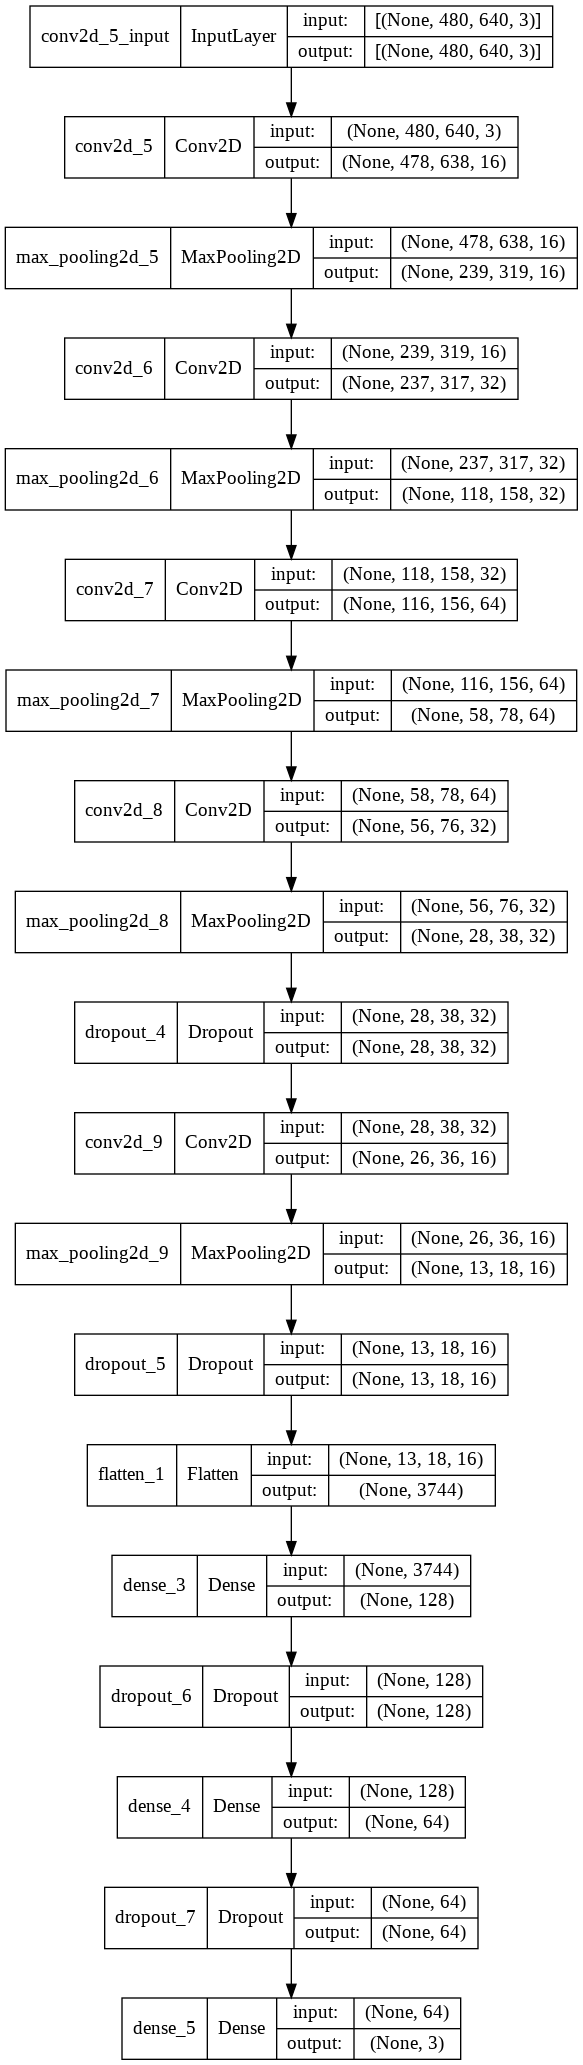

In [ ]:
#graficamos el modelo de la red neuronal
keras.utils.plot_model(model,"my_model.png",show_shapes=True)

In [ ]:
#compilar el modelo
model.compile(loss="categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

In [ ]:
#preparamos nuestros datos de entrenamiento
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#reescalar nuestras imagenes a 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    "train/",  #directorio con las clase de entrenamiento
    target_size=(480,640),
    batch_size=10
)

Found 734 images belonging to 3 classes.


In [ ]:
#preparar nuestros datos de validacion
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#reescalar nuestras imagenes a 1./255
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator=train_datagen.flow_from_directory(
    "validation/",
    target_size = (480,640),
    batch_size=10
    ) # directorio con las clases de entrenameinto


Found 450 images belonging to 3 classes.


In [ ]:
#entrenamiento
history=model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=30,
    validation_data=validation_generator,
    verbose=1)

Epoch 1/30
20/20 [==============================] - 10s 458ms/step - loss: 1.0082 - accuracy: 0.5050 - val_loss: 0.9234 - val_accuracy: 0.4356
Epoch 2/30
20/20 [==============================] - 9s 437ms/step - loss: 0.4227 - accuracy: 0.8150 - val_loss: 1.3797 - val_accuracy: 0.6667
Epoch 3/30
20/20 [==============================] - 10s 526ms/step - loss: 0.1788 - accuracy: 0.9330 - val_loss: 2.0649 - val_accuracy: 0.6667
Epoch 4/30
20/20 [==============================] - 9s 442ms/step - loss: 0.0278 - accuracy: 0.9900 - val_loss: 2.1076 - val_accuracy: 0.6311
Epoch 5/30
20/20 [==============================] - 9s 439ms/step - loss: 0.0055 - accuracy: 0.9948 - val_loss: 3.9723 - val_accuracy: 0.6311
Epoch 6/30
20/20 [==============================] - 9s 485ms/step - loss: 0.0208 - accuracy: 0.9900 - val_loss: 1.2308 - val_accuracy: 0.7444
Epoch 7/30
20/20 [==============================] - 9s 441ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 1.8676 - val_accuracy: 0.6467
Epoc

In [ ]:
#probar nuestro modelo
objetos= ["CUBO DE RUBIK","GORRA","PELUCHE OSO"]

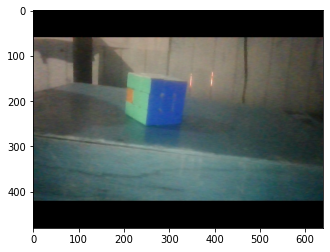

In [ ]:
 import numpy as np
 import cv2 as cv
 import matplotlib.pyplot as plt

path="train/CUBO_RUBIK/80.jpg"
img=cv.imread(path)
plt.imshow(img)

In [ ]:
img=img/255
img=np.expand_dims(img,axis=0)
img_tensor = np.vstack([img])
classes=model.predict(img_tensor)


print("presicion=",classes[0,np.argmax(classes)])
print("objetos=",objetos[np.argmax(classes)])


presicion= 0.9999906
objetos= CUBO DE RUBIK
